# Mintun1984 for Twilite and Image-Derived Input Functions

## Setup

In [1]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

from BoxcarContext import BoxcarContext
from RadialArteryContext import RadialArteryContext
from Mintun1984Context import Mintun1984Context
%matplotlib inline
# from matplotlib import pyplot as plt

In [3]:
# everything is decay corrected

kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "kernels")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")

oo1dir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "ses-20210421150523", "pet")
idif = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif-BoxcarIO-ideal.nii.gz")
twil = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc-RadialArteryIO-ideal.nii.gz")
pet = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

oo2dir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "ses-20210421154248", "pet")
idif2 = os.path.join(oo2dir, "sub-108293_ses-20210421154248_trc-oo_proc-MipIdif_idif-BoxcarIO-ideal.nii.gz")
twil2 = os.path.join(oo2dir, "sub-108293_ses-20210421154248_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc-RadialArteryIO-ideal.nii.gz")
pet2 = os.path.join(oo2dir, "sub-108293_ses-20210421154248_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")
idif2_pickle = os.path.join(oo2dir, "sub-108293_ses-20210421154248_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-schaeffer-TissueIO-Boxcar--Mintun1984.pickle")
twil2_pickle = os.path.join(oo2dir, "sub-108293_ses-20210421154248_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-schaeffer-TissueIO-Artery--Mintun1984.pickle")

hodir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "ses-20210421152358", "pet")
ks_idif = os.path.join(hodir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-TissueIO-Boxcar-qm.nii.gz")
ks_twil = os.path.join(hodir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-TissueIO-Artery-qm.nii.gz")

codir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2025", "data", "ses-20210421144815", "pet")
v1_idif = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-idif_martinv1.nii.gz")
v1_twil = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-twilite_martinv1.nii.gz")

bc_idif2 = BoxcarContext({
    "input_func_fqfn": idif2,
    "tissue_fqfn": pet2,
    "nlive": 1000,
    "tag": "playground_figs"
})

mm_idif = Mintun1984Context({
    "input_func_fqfn": idif,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_idif,
    "ks_fqfn": ks_idif,
    "nlive": 1000,
    "tag": "playground_figs"
})
mm_idif2 = Mintun1984Context({
    "input_func_fqfn": idif2,
    "tissue_fqfn": pet2,
    "v1_fqfn": v1_idif,
    "ks_fqfn": ks_idif,
    "nlive": 1000,
    "tag": "playground_figs"
})

ra_twil2 = RadialArteryContext({
    "kernel_fqfn": kern,
    "input_func_fqfn": twil2,
    "tissue_fqfn": pet2,
    "nlive": 1000,
    "tag": "playground_figs"
})

mm_twil = Mintun1984Context({
    "kernel_fqfn": kern,
    "input_func_fqfn": twil,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_twil,
    "ks_fqfn": ks_twil,
    "nlive": 1000,
    "tag": "playground_figs"
})
mm_twil2 = Mintun1984Context({
    "kernel_fqfn": kern,
    "input_func_fqfn": twil2,
    "tissue_fqfn": pet2,
    "v1_fqfn": v1_twil,
    "ks_fqfn": ks_twil,
    "nlive": 1000,
    "tag": "playground_figs"
})

truths_idif2 = np.asarray([
    4.058358155347350, 8.556498035298400, 1.3961247548029300, 4.836656464442650, 2.542097717253860, -0.7558178533429250, -2.055035785250630, 313.6488752640960, 0.5844700008279830, 0.06981091037153330, 2.4980842866863200, 0.050522519666702700
])

truths_twil2 = np.asarray([
    5.891441045223020, 11.530538589362000, 1.4607765779777700, 10.6701801625203, 2.7450002873699700, -0.21511158237682700, -2.497569456273940, 404.9430311743300, 0.36600701774978300, 0.06981416026650790, 2.4571616828843300, 0.03082328901666160
])

""" 
$t_0$
$\tau_2$
$\alpha - 1$
$1/\beta$
$p$
$\delta p_2$
$\delta p_3$
$1/\gamma$
$f_2$
$f_3$
$A$
$\sigma$
"""

## Inspect Mintun1984Context twil

In [ ]:
ra_twil2.plotting.variations_plot(
    truths_twil2, 
    tindex=3, tmin=3, tmax=33, 
    ncolors=1000, alpha=0.1, linewidth=3,
    do_show_xlabel=False,
    do_save=True)

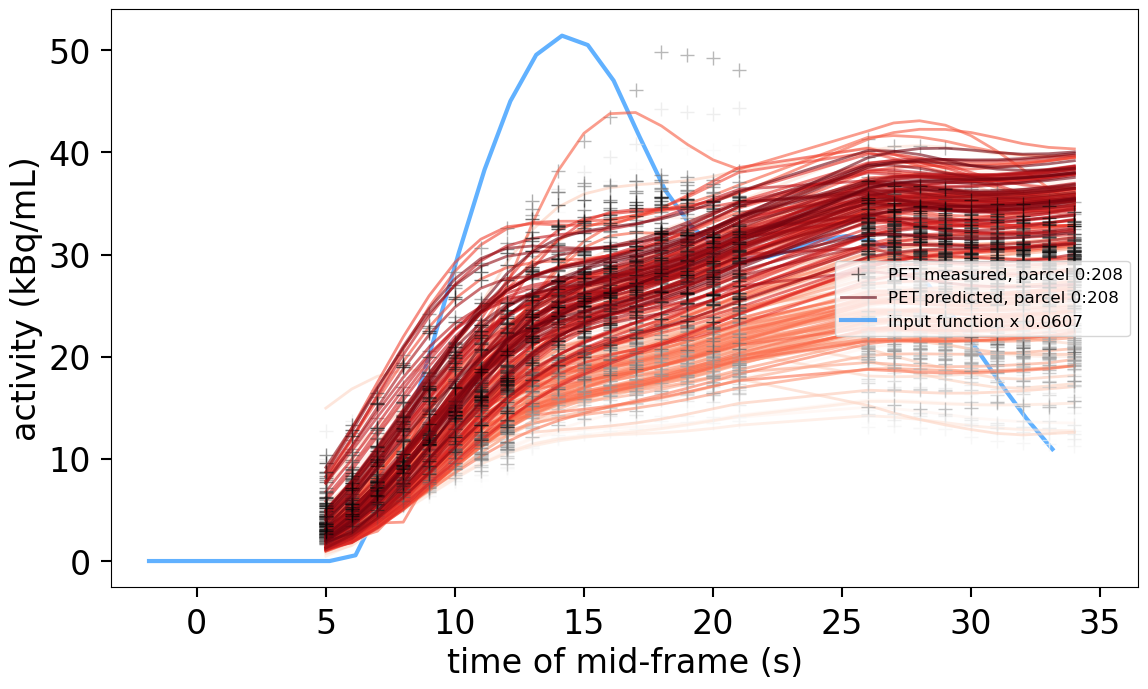

In [4]:
mm_twil2.plotting.parcs_plot(results=twil2_pickle, parc_index=list(range(209)))

## Inspect Mintun1984Context idif

In [ ]:
bc_idif2.plotting.variations_plot(
    truths_idif2, 
    tindex=3, tmin=3, tmax=33, 
    ncolors=1000, alpha=0.1, linewidth=3,
    do_show_xlabel=False,
    do_save=True)

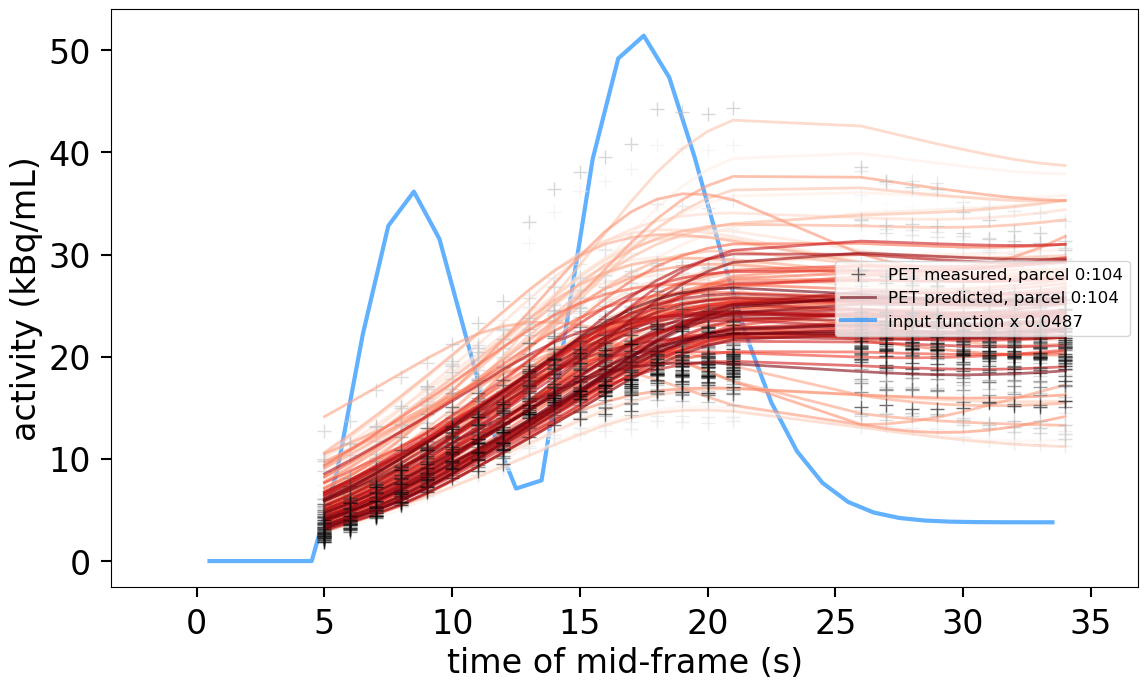

In [4]:
mm_idif2.plotting.parcs_plot(results=idif2_pickle, parc_index=list(range(105)))